# Matplotlib - practice

Use this notebook to complete the exercises throughout the workshop.

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 6]
# Please execute this at the start of the notebook

base_url = 'https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/data-StefanieMolin/'
filename = '2019_Yellow_Taxi_Trip_Data.csv'

urllib.request.urlretrieve(base_url + filename, filename)

df = pd.read_csv(filename)

df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

## Colormap

First example 

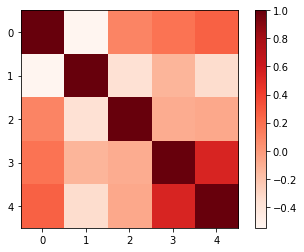

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/titanic_train.csv', 
                     index_col=0)

data['SexAsInt'] = (data['Sex'] == 'female')

plt.imshow(data.get(['Fare', 'Pclass', 'Age', 'SexAsInt', 'Survived']).corr(), 
           interpolation='nearest', 
           cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

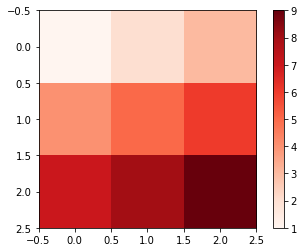

In [3]:
plt.imshow([[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
           interpolation='nearest', 
           cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

## Plotting data

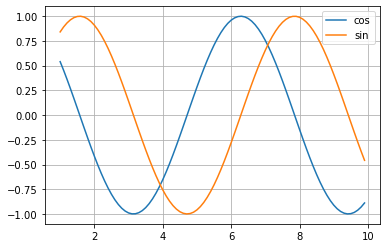

In [4]:
import numpy as np
x =np.arange(1, 10, 0.1)
y = np.cos(x)

plt.plot(x, y, label = "cos")
plt.plot(x, np.sin(x), label = "sin")
plt.grid()
plt.legend()

## Histogram

<AxesSubplot:>

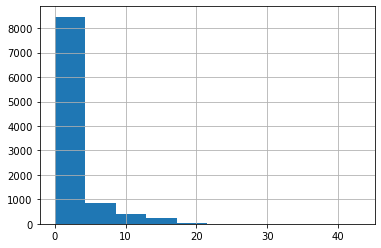

In [5]:
df['tip_amount'].hist()

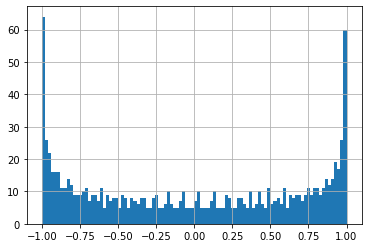

In [6]:
import numpy as np

x = np.arange(1, 100, 0.1)
y = np.cos(x)

# You can directly it on matplotlib
plt.hist(y, bins = 100)

plt.grid()
plt.savefig("test.png")

## Subplots

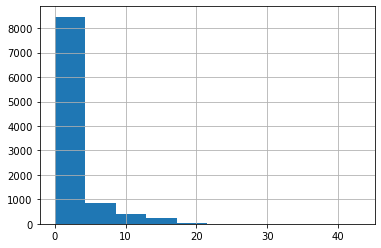

In [7]:
fig, ax = plt.subplots()
ax.hist(df['tip_amount'].values)
ax.grid()
plt.show()

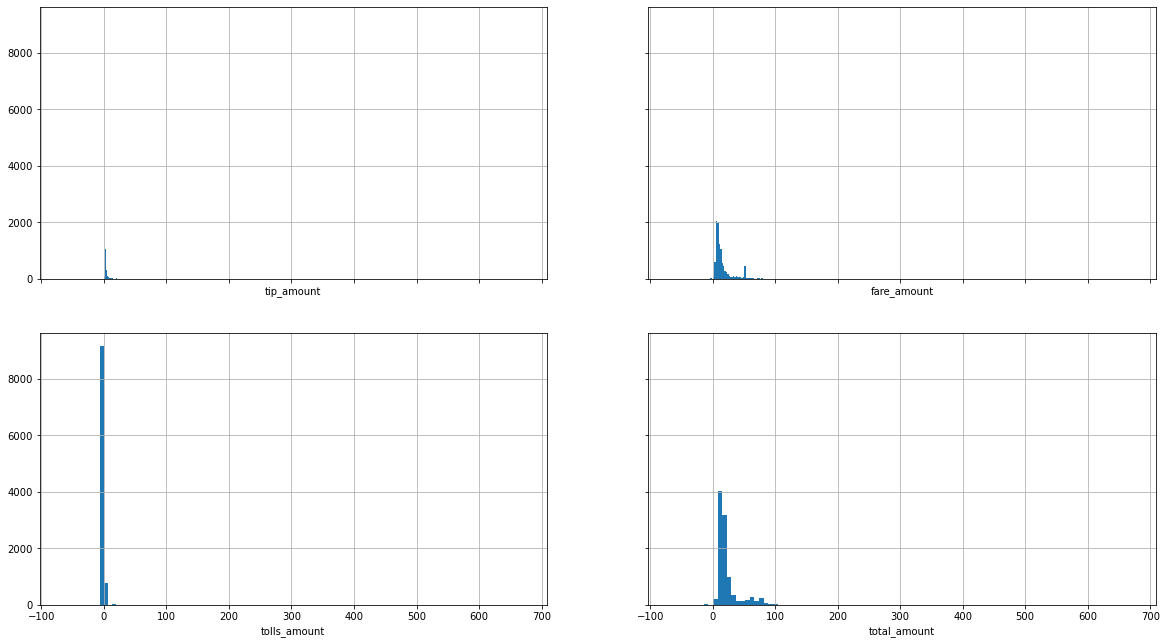

In [8]:
plt.rcParams['figure.figsize'] = [20, 11]
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)

all_values = ((df['tip_amount'].values, df['fare_amount'].values), 
              (df['tolls_amount'].values, df['total_amount'].values))

labels = (('tip_amount', 'fare_amount'), ('tolls_amount', 'total_amount'))

for i in range(2):
    for j in range(2):
        ax[i][j].hist(all_values[i][j], bins=100)
        ax[i][j].grid()
        ax[i][j].set_xlabel(labels[i][j])
        
plt.show()

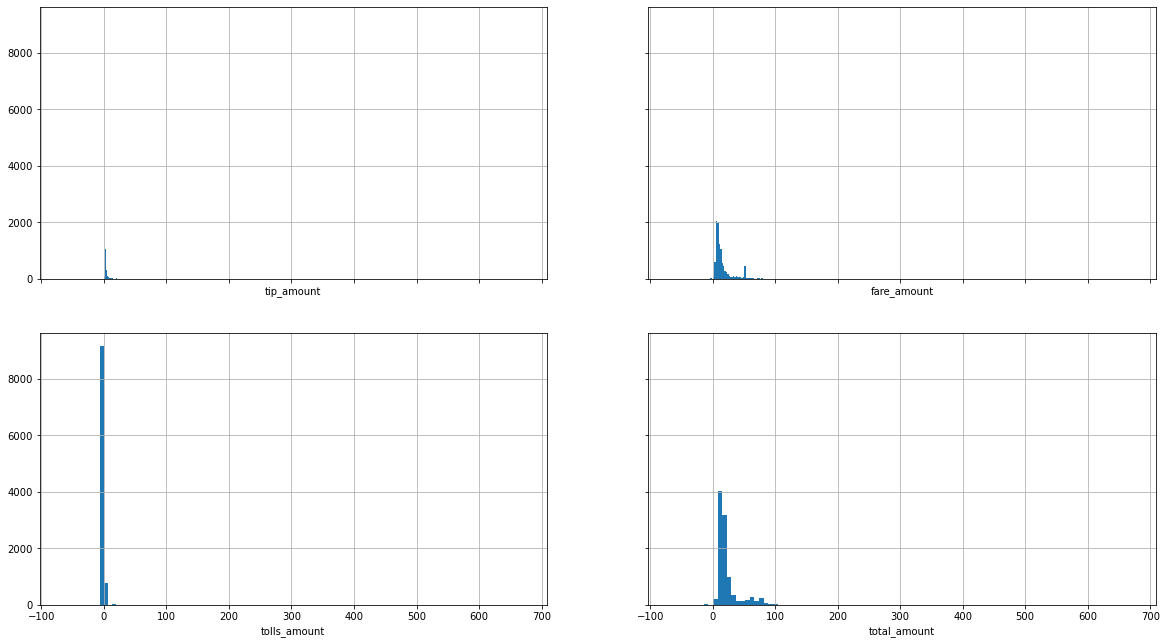

In [9]:
plt.rcParams['figure.figsize'] = [20, 11]
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)

all_values = ((df['tip_amount'].values, df['fare_amount'].values), 
              (df['tolls_amount'].values, df['total_amount'].values))

labels = (('tip_amount', 'fare_amount'), ('tolls_amount', 'total_amount'))

for ax_, value_, label_ in zip(axes, all_values, labels):
    for ax, value, label in zip(ax_, value_, label_):
        ax.hist(value, bins=100)
        ax.grid()
        ax.set_xlabel(label)
        
plt.show()

## 

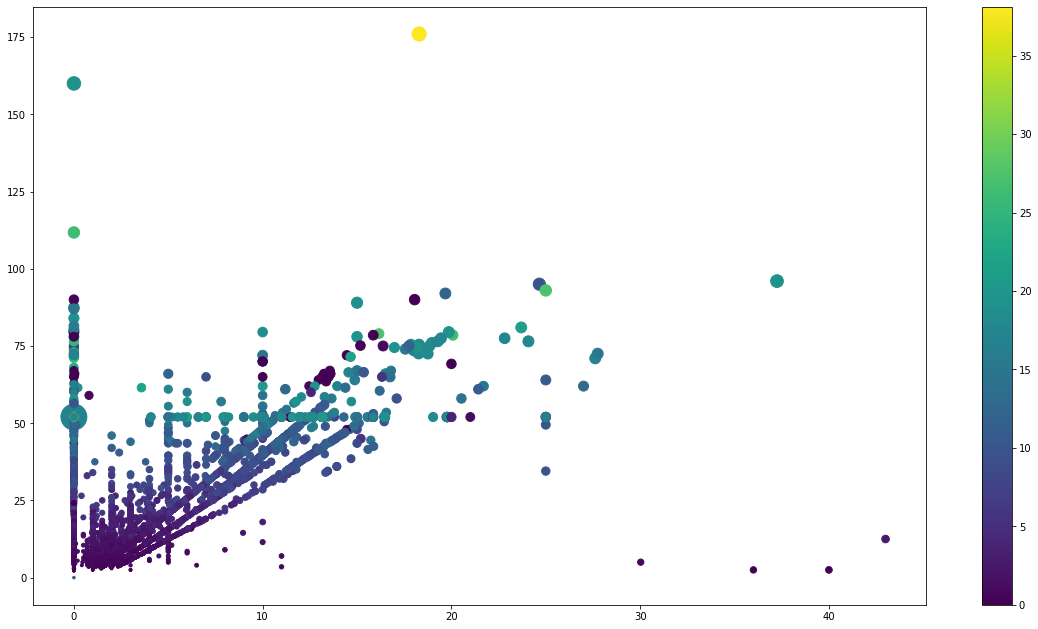

In [10]:
df_clean = df[(df['total_amount'].values > 0)] 

plt.scatter(df_clean['tip_amount'], 
            df_clean['fare_amount'],
            c = df_clean['trip_distance'],
            s = df_clean['total_amount']
           )
plt.colorbar()

In [11]:
 df[df['tip_amount'] > 35]

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3304,1,2019-10-23T16:14:18.000,2019-10-23T16:30:00.000,1,2.80,1,N,133,181,1,12.5,1.0,0.5,43.00,0.0,0.3,57.30,0.0
4275,2,2019-10-23T16:15:25.000,2019-10-23T16:15:32.000,1,0.00,1,N,193,264,1,2.5,1.0,0.5,40.00,0.0,0.3,44.30,0.0
8868,2,2019-10-23T16:49:26.000,2019-10-23T16:52:02.000,5,0.05,1,N,228,228,1,2.5,1.0,0.5,36.00,0.0,0.3,40.30,0.0
9758,1,2019-10-23T17:20:50.000,2019-10-23T18:58:16.000,1,19.50,3,N,162,1,1,96.0,1.0,0.0,37.25,27.0,0.3,161.55,0.0


In [12]:
df['tolls_amount'].value_counts()

 0.00      9164
 6.12       764
 12.50       16
 17.50        6
 5.76         6
 18.50        4
 2.80         4
 20.00        3
 15.25        2
 18.62        2
 18.00        2
 10.62        2
 15.00        1
 8.12         1
 17.90        1
 14.95        1
 15.95        1
 21.12        1
 8.62         1
 18.60        1
 12.24        1
 18.70        1
 9.50         1
-6.12         1
 12.54        1
 21.00        1
 25.00        1
 2.29         1
 10.00        1
 6.14         1
 14.70        1
 14.65        1
 13.90        1
 15.50        1
 612.00       1
 19.75        1
 27.00        1
Name: tolls_amount, dtype: int64